# HandWritten Digit Recognition Using SVM

## Importing Libraries and Loading Dataset

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

## Summarising the Data

In [15]:
df = load_digits()
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [21]:
print(df.data)
print(df.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [10]:
print(df.target_names)
print(df.target_names.shape)

[0 1 2 3 4 5 6 7 8 9]
(10,)


In [16]:
print(df.target)
print(df.target.shape)

[0 1 2 ... 8 9 8]
(1797,)


In [11]:
print(df.images)
print(df.images.shape)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

## Visualising the Data

<Figure size 432x288 with 0 Axes>

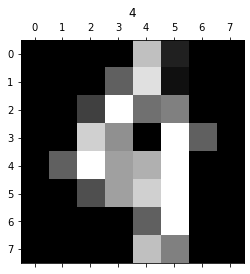

[[ 0.  0.  0.  0. 12.  2.  0.  0.]
 [ 0.  0.  0.  6. 14.  1.  0.  0.]
 [ 0.  0.  4. 16.  7.  8.  0.  0.]
 [ 0.  0. 13.  9.  0. 16.  6.  0.]
 [ 0.  6. 16. 10. 11. 16.  0.  0.]
 [ 0.  0.  5. 10. 13. 16.  0.  0.]
 [ 0.  0.  0.  0.  6. 16.  0.  0.]
 [ 0.  0.  0.  0. 12.  8.  0.  0.]]


In [17]:
n = 24                      # nth image out of 1797 images
plt.gray()
plt.matshow(df.images[n])   # Ploting gray scale image of digit
plt.title(df.target[n])     # Target digit name as title
plt.show()

print(df.images[n])         # Matrix form of the pixeks of the digit

## Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)

## Input - Array of Pixels(0 - 16 range value) & Output - Target Digit(0 - 9)

In [23]:
X = df.data      # Equals to df.images.reshape((df.shape[0],-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
Y = df.target
Y

array([0, 1, 2, ..., 8, 9, 8])

## Splitting the dataset into Train and Test models

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print("Size of Train set : ", X_train.shape[0])
print("Size of test set : ", X_test.shape[0])

Size of Train set :  1347
Size of test set :  450


In [43]:
X_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [44]:
Y_train

array([2, 8, 9, ..., 7, 7, 8])

## Training the Model

In [30]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')     # Training of model using the linear kernel
model.fit(X_train, Y_train)

SVC(kernel='linear')

## Prediction with test data

In [32]:
Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), axis = 1))

[[2 2]
 [8 8]
 [2 2]
 [6 6]
 [6 6]
 [7 7]
 [1 1]
 [9 9]
 [8 8]
 [5 5]
 [2 2]
 [8 8]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [1 1]
 [0 0]
 [5 5]
 [8 8]
 [8 8]
 [7 7]
 [8 8]
 [4 4]
 [7 7]
 [5 5]
 [4 4]
 [9 9]
 [2 2]
 [9 9]
 [4 4]
 [7 7]
 [6 6]
 [8 8]
 [9 9]
 [4 4]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [8 8]
 [6 6]
 [7 7]
 [7 7]
 [1 1]
 [0 0]
 [7 7]
 [6 6]
 [2 2]
 [1 1]
 [9 9]
 [6 6]
 [7 7]
 [9 9]
 [0 0]
 [0 0]
 [5 5]
 [1 1]
 [6 6]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [4 4]
 [1 1]
 [9 9]
 [2 2]
 [6 6]
 [9 9]
 [1 1]
 [8 8]
 [3 3]
 [5 5]
 [1 1]
 [2 2]
 [8 8]
 [2 2]
 [2 2]
 [9 9]
 [7 7]
 [2 2]
 [3 3]
 [6 6]
 [0 0]
 [5 5]
 [3 3]
 [7 7]
 [5 5]
 [1 1]
 [2 2]
 [9 9]
 [9 9]
 [3 3]
 [1 1]
 [7 7]
 [7 7]
 [4 4]
 [8 8]
 [5 5]
 [8 8]
 [5 5]
 [5 5]
 [2 2]
 [5 5]
 [9 9]
 [0 0]
 [7 7]
 [1 1]
 [4 4]
 [4 7]
 [3 3]
 [4 4]
 [8 8]
 [9 9]
 [7 7]
 [9 9]
 [8 8]
 [2 2]
 [1 6]
 [5 5]
 [2 2]
 [5 5]
 [8 8]
 [4 4]
 [1 8]
 [7 7]
 [0 0]
 [6 6]
 [1 1]
 [5 5]
 [5 9]
 [9 9]
 [9 9]
 [5 5]
 [9 9]
 [9 9]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [2 2]
 [8 8]
 [6 6]

## Accuracy of the SVM Model  using linear kernel

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
Confusion_Matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix :\n", Confusion_Matrix)           # Gives 8 x 8 matrix which shows how many Actual Digit and predicted Digit matchings from the testing set
print("Accuracy score : {0:.2f}%".format(accuracy_score(Y_test, Y_pred)*100))

Confusion Matrix :
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]
Accuracy score : 97.11%


## Output of one example from TestSet

Predicted value :  [2]


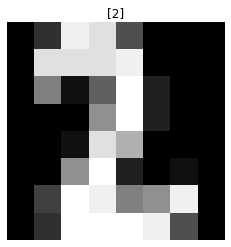

Actual value :  2


In [65]:
n=10                                     # nth example of test set
plt.imshow(X_test[n].reshape(8, 8))     
print("Predicted value : ", result)
plt.axis('off')
plt.title(result)
plt.show()
print("Actual value : ", Y_test[n])

## Checking Accuracy of models with different SVM - Kernel Training techniques

In [38]:
model1 = svm.SVC(kernel='linear')
model2 = svm.SVC(kernel='rbf')
model3 = svm.SVC(gamma=0.001)
model4 = svm.SVC(gamma=0.001,C=0.1)

model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)
model4.fit(X_train,Y_train)

Y_pred1 = model1.predict(X_test)
Y_pred2 = model2.predict(X_test)
Y_pred3 = model3.predict(X_test)
Y_pred4 = model4.predict(X_test)

print("Accuracy of the Model 1: {0:.2f}%".format(accuracy_score(Y_test, Y_pred1)*100))
print("Accuracy of the Model 2: {0:.2f}%".format(accuracy_score(Y_test, Y_pred2)*100))
print("Accuracy of the Model 3: {0:.2f}%".format(accuracy_score(Y_test, Y_pred3)*100))
print("Accuracy of the Model 4: {0:.2f}%".format(accuracy_score(Y_test, Y_pred4)*100))

Accuracy of the Model 1: 97.11%
Accuracy of the Model 2: 99.11%
Accuracy of the Model 3: 99.56%
Accuracy of the Model 4: 96.67%


### Thank You